# Get the Source Data 

These command a linux based - but are easily accomplished on Windows.


    wget https://data.reversebeacon.net/rbn_history/20231125.zip 
    wget https://data.reversebeacon.net/rbn_history/20231126.zip 

## Now Expand the files 

    unzip  20231125.zip 
    unzip  20231126.zip 
    

## Check we have 2 CSV files 

    ls 2023*.csv

And you should see 

    20231125.csv	20231126.csv

In [2]:
import pandas as pd

In [15]:
df1 = pd.read_csv('20231125.csv')
df2 = pd.read_csv('20231126.csv')
#+pd.read_csv('20231126.csv')
df=pd.concat([df1,df2])

In [16]:
# Lets check the top of the File 
df.head()

,callsign,de_pfx,de_cont,freq,band,dx,dx_pfx,dx_cont,mode,db,date,speed,tx_mode
0,BH4RXP,BY,AS,28065.6,10m,JJ2JQF,JA,AS,CQ,20.0,2023-11-25 00:00:00,30.0,CW
1,BH4RXP,BY,AS,10127.0,30m,JA9IPF/7,JA,AS,CQ,8.0,2023-11-25 00:00:00,25.0,CW
2,BH4RXP,BY,AS,21024.0,15m,W7RM,K,NaN,CQ,32.0,2023-11-25 00:00:00,34.0,CW
3,BH4RXP,BY,AS,28046.5,10m,JR2GRX,JA,AS,CQ,34.0,2023-11-25 00:00:00,35.0,CW
4,BH4RXP,BY,AS,28030.5,10m,N7DX,K,NaN,CQ,23.0,2023-11-25 00:00:00,37.0,CW


In [19]:
# Make sure the Date is a Pandas data type 
df['date'] = pd.to_datetime(df.date)

<Axes: title={'center': 'CQWW Hourly rates'}, xlabel='date'>

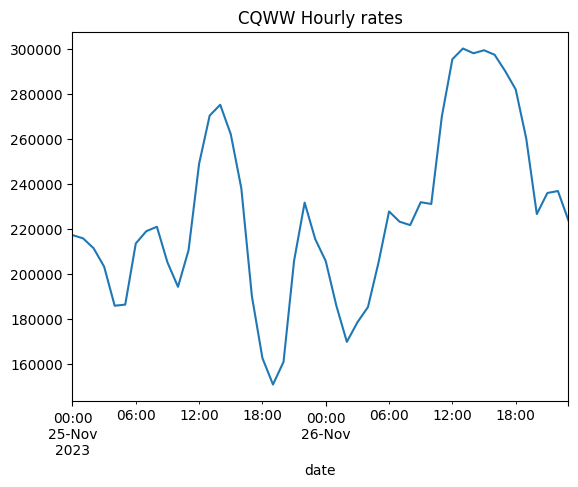

In [22]:
# Graphing 
dfh=df.groupby(pd.Grouper(key='date', axis=0, freq='H'))['freq'].count()
dfh.plot(title="CQWW Hourly rates")

# By say the 10m Band is possible 

You can also add filters for CONT, DX etc 

<Axes: title={'center': 'CQWW Hourly rates. 10m only.'}, xlabel='date'>

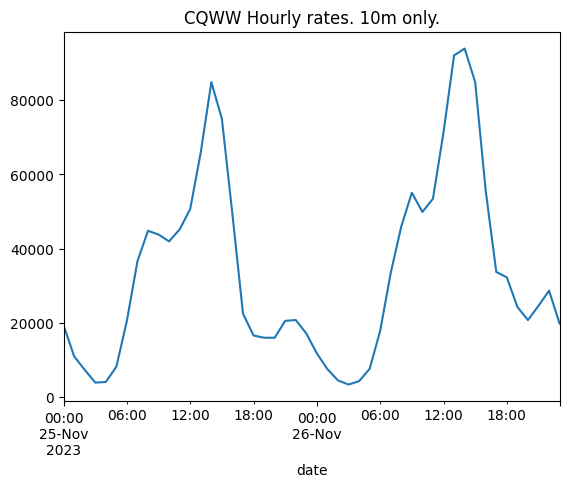

In [24]:
df_tenMeter = df[df.band=='10m']
dfh=df_tenMeter.groupby(pd.Grouper(key='date', axis=0, freq='H'))['freq'].count()
dfh.plot(title="CQWW Hourly rates. 10m only.")